In [106]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
import numpy as np
import os

%matplotlib notebook
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize']=[10,6]
pd.options.display.width = 0
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [107]:
%matplotlib notebook

In [108]:
data_path = 'bench_results.csv'
data = pd.read_csv(data_path)

max_rt_ratio = 0.8
min_rt_seg_ratio = 1

In [109]:
print(f'Every finished run with Realtime Duration Ratio less than {max_rt_ratio} and Realtime Segments Ratio above {min_rt_seg_ratio} is accounted when calculating Max Session Count.')

Every finished run with Realtime Duration Ratio less than 0.8 and Realtime Segments Ratio above 1 is accounted when calculating Max Session Count.


In [110]:
# mem to mb
# top ram format reading errors fixes
data.max_ram = data.max_ram / 1024**3
data.loc[data.max_ram<1, 'max_ram'] = data.max_ram[data.max_ram<1]*1024

data.max_vram = data.max_vram / 1024**2
data['ok'] = np.logical_and(data.rt_dur_ratio<max_rt_ratio,data.rt_seg_ratio>=min_rt_seg_ratio)
data_nice = data[np.logical_and(data.rt_dur_ratio<max_rt_ratio,data.rt_seg_ratio>=min_rt_seg_ratio)]

<IPython.core.display.Javascript object>


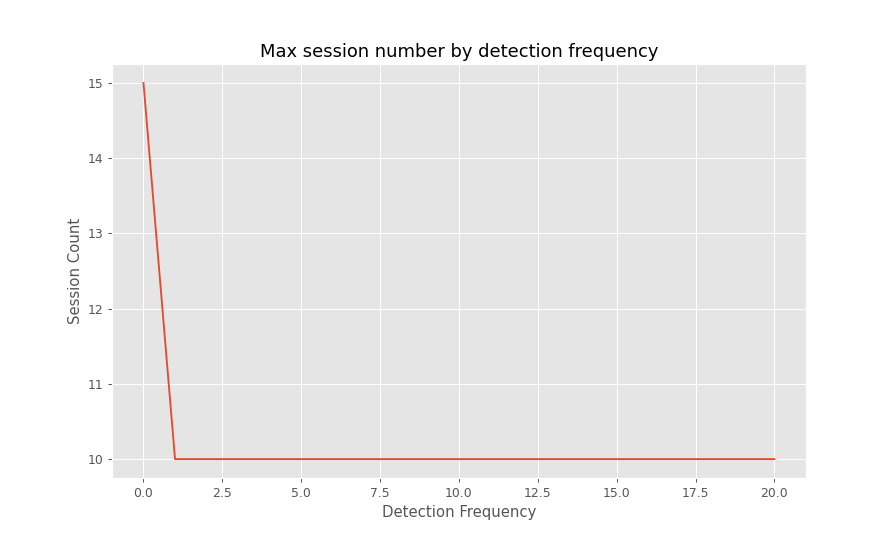

<AxesSubplot:title={'center':'Max session number by detection frequency'}, xlabel='Detection Frequency', ylabel='Session Count'>

In [112]:
data_nice.sess_count.groupby(data_nice.detect_freq).max().plot(ylabel='Session Count', xlabel='Detection Frequency', title='Max session number by detection frequency')

<IPython.core.display.Javascript object>


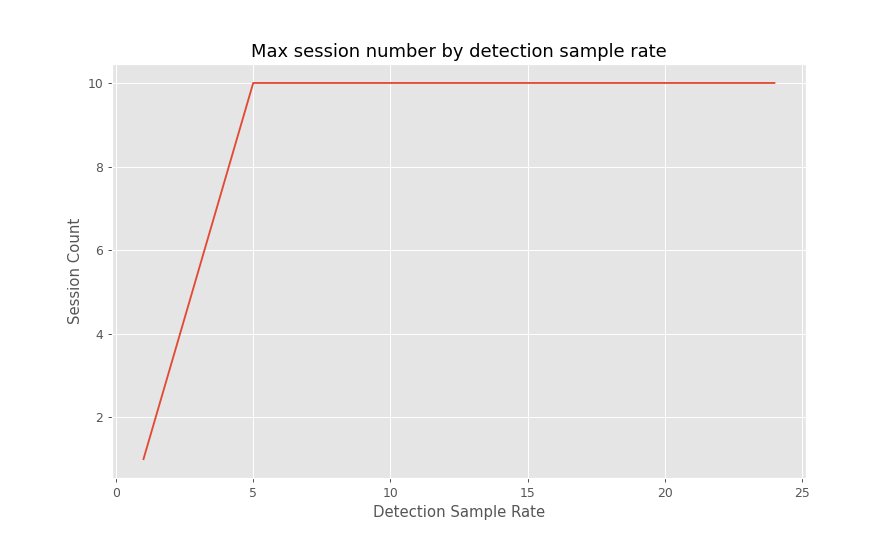

<AxesSubplot:title={'center':'Max session number by detection sample rate'}, xlabel='Detection Sample Rate', ylabel='Session Count'>

In [122]:
data_nice_det = data_nice[data_nice.detect_freq>0]
data_nice_det.sess_count.groupby(data_nice_det.detect_sample_rate).max().plot(ylabel='Session Count', xlabel='Detection Sample Rate', title='Max session number by detection sample rate')

In [113]:
def draw_ok(series, plt):
    for s in series:
        markers=np.where(data_pivoted.ok[s], '#00AA00', np.where(data_pivoted.returncode[s]==0, '#FFBB22', '#FF0000'))
        plt.scatter(x = series[s].index, y=series[s], c=markers)

<IPython.core.display.Javascript object>


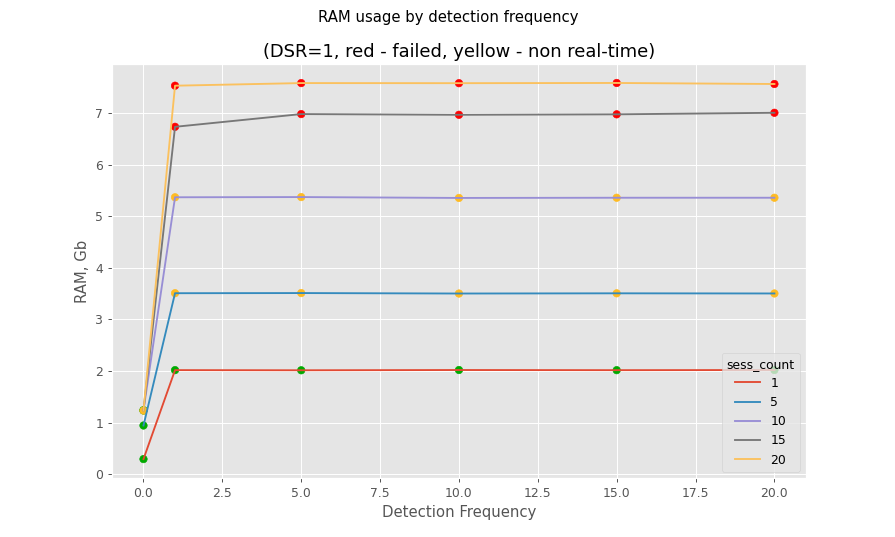

Text(0.5, 0.98, 'RAM usage by detection frequency')

In [114]:
data_filtered = data[data.detect_sample_rate==1]
data_pivoted = data_filtered.pivot(index='detect_freq', columns='sess_count')
plt = data_pivoted.max_ram.plot(ylabel='RAM, Gb', xlabel='Detection Frequency', title='(DSR=1, red - failed, yellow - non real-time)')
draw_ok(data_pivoted.max_ram, plt)
pyplot.suptitle('RAM usage by detection frequency')

<IPython.core.display.Javascript object>


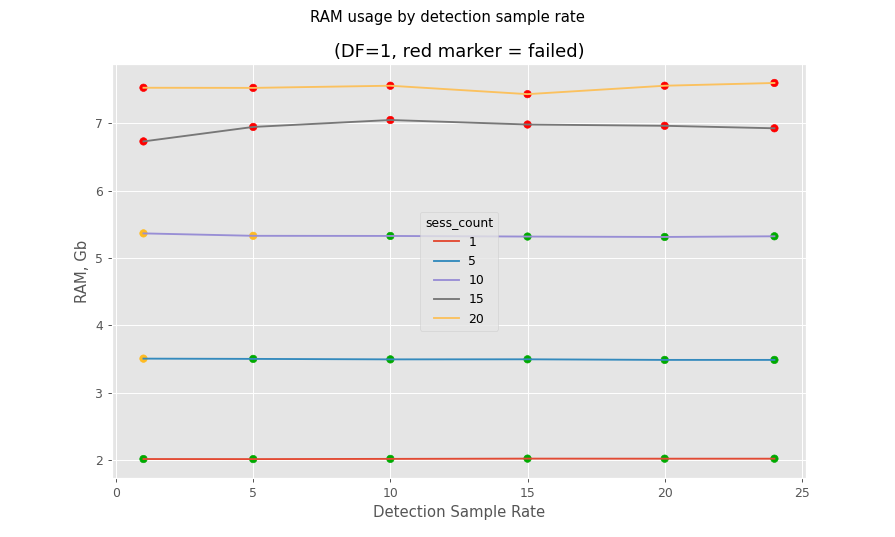

In [115]:
data_filtered = data[data.detect_freq==1]
data_pivoted = data_filtered.pivot(index='detect_sample_rate', columns='sess_count')
plt = data_pivoted.max_ram.plot(ylabel='RAM, Gb', xlabel='Detection Sample Rate', title=f'(DF=1, red marker = failed)')
pyplot.suptitle('RAM usage by detection sample rate')
draw_ok(data_pivoted.max_ram, plt)

<IPython.core.display.Javascript object>


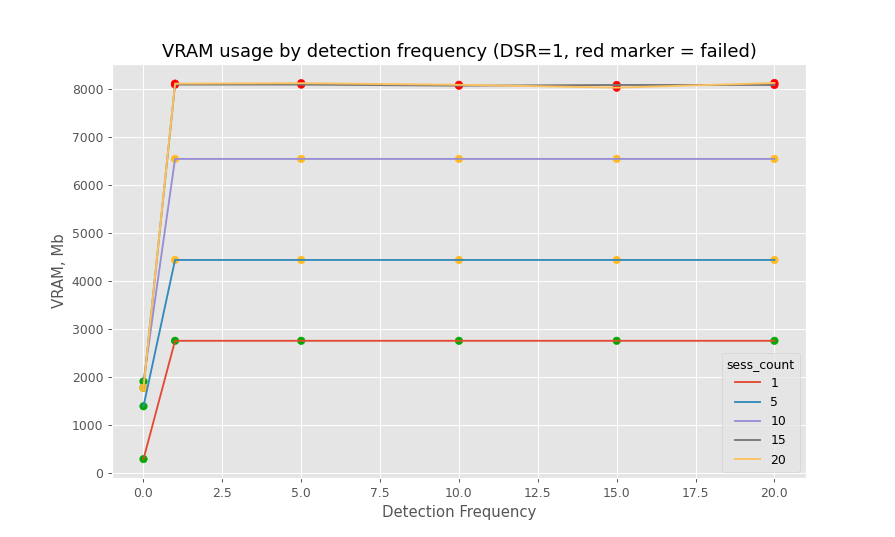

In [116]:
data_filtered = data[data.detect_sample_rate==1]
data_pivoted = data_filtered.pivot(index='detect_freq', columns='sess_count')
plt = data_pivoted.max_vram.plot(ylabel='VRAM, Mb', xlabel='Detection Frequency', title='VRAM usage by detection frequency (DSR=1, red marker = failed)')
draw_ok(data_pivoted.max_vram, plt)

<IPython.core.display.Javascript object>


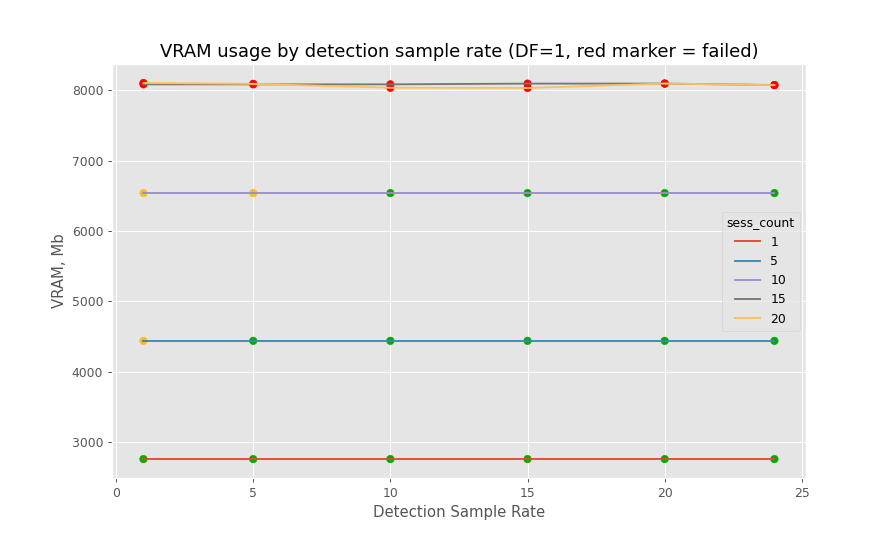

In [117]:
data_filtered = data[data.detect_freq==1]
data_pivoted = data_filtered.pivot(index='detect_sample_rate', columns='sess_count')
plt = data_pivoted.max_vram.plot(ylabel='VRAM, Mb', xlabel='Detection Sample Rate', title='VRAM usage by detection sample rate (DF=1, red marker = failed)')
draw_ok(data_pivoted.max_vram, plt)

<IPython.core.display.Javascript object>


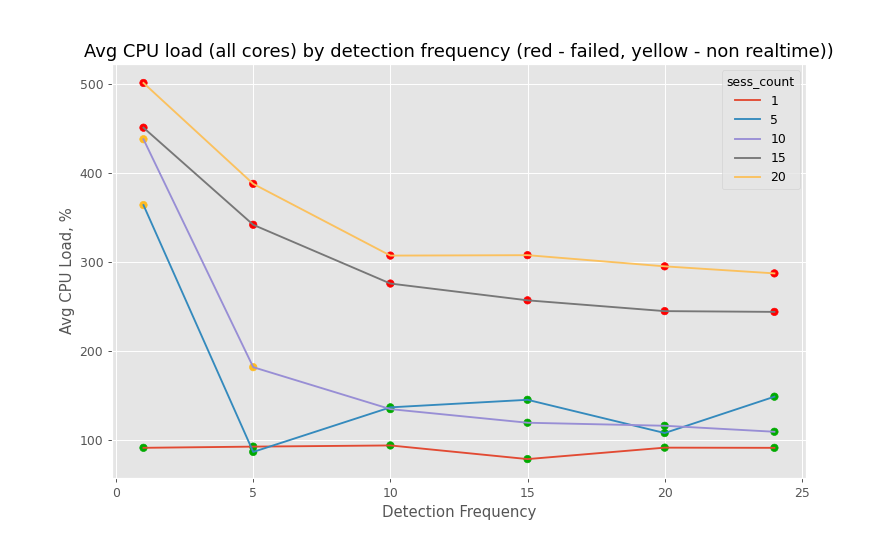

In [118]:
plt = data_pivoted.avg_cpu.plot(ylabel='Avg CPU Load, %', xlabel='Detection Frequency', title='Avg CPU load (all cores) by detection frequency (red - failed, yellow - non realtime))')
draw_ok(data_pivoted.avg_cpu, plt)

<IPython.core.display.Javascript object>


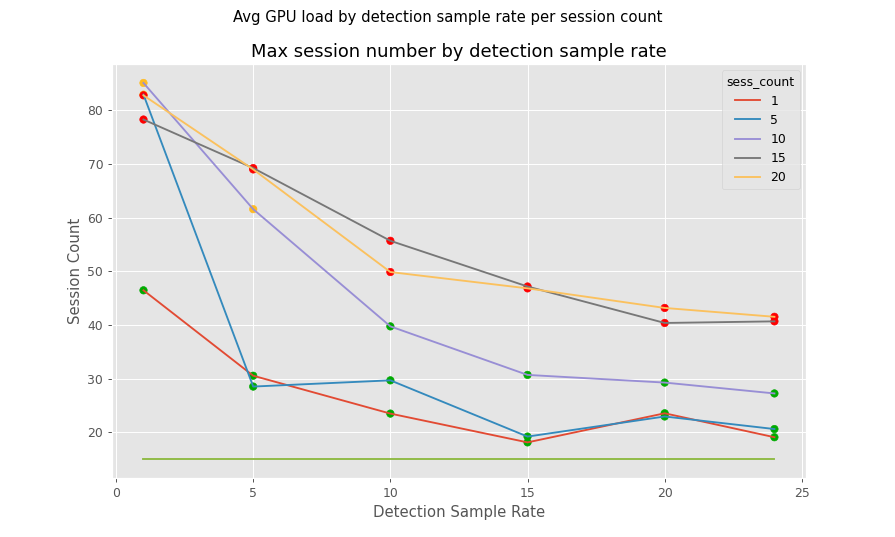

Text(0.5, 0.98, 'Avg GPU load by detection sample rate per session count')

In [119]:
plt = data_pivoted.avg_gpu.plot(ylabel='Avg GPU Load, %', xlabel='Detection Sample Rate', title='(red - failed, yellow - non realtime)')
draw_ok(data_pivoted.avg_gpu, plt)
pyplot.suptitle('Avg GPU load by detection sample rate per session count')